In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style

In [22]:
data=pd.read_excel('compilationErrorsHumanEval.xlsx')
data.dropna(inplace=True)
data.head()

ID  Model  \
0  Codex-scenario2/AllPrefixes_allPrefixes_2000_T...  Codex   
1  Codex-scenario2/AllPrefixes_allPrefixes_2000_T...  Codex   
2  Codex-scenario2/AllPrefixes_allPrefixes_2000_T...  Codex   
3  Codex-scenario2/AllPrefixes_allPrefixes_2000_T...  Codex   
4                 Codex-scenario1/F_f_4000_Test.java  Codex   

                                               File locaton  \
0  scenario2/AllPrefixes_allPrefixes_2000_Test.java  134,10   
1  scenario2/AllPrefixes_allPrefixes_2000_Test.java  153,10   
2  scenario2/AllPrefixes_allPrefixes_2000_Test.java  172,10   
3  scenario2/AllPrefixes_allPrefixes_2000_Test.java  191,10   
4                      scenario1/F_f_4000_Test.java   31,36   

                                     semantic reason  
0  method testAllPrefixes_SingleWordWithSpaceAtBe...  
1  method testAllPrefixes_SingleWordWithSpaceAtBe...  
2  method testAllPrefixes_SingleWordWithSpaceAtBe...  
3  method testAllPrefixes_SingleWordWithSpaceAtBe...  
4  incompatible types: long cannot be converted t...

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['semantic reason']) #ERROR AFTER EXECUTING THESE #LINES
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(21380, 3457)


For n_clusters = 2 The average silhouette_score is : 0.14282780968354583
For n_clusters = 3 The average silhouette_score is : 0.1506968554124
For n_clusters = 4 The average silhouette_score is : 0.18330110978330716
For n_clusters = 5 The average silhouette_score is : 0.21189552060777647
For n_clusters = 6 The average silhouette_score is : 0.22338393946968568
For n_clusters = 7 The average silhouette_score is : 0.2342085402389742
For n_clusters = 8 The average silhouette_score is : 0.20426684029697753
For n_clusters = 9 The average silhouette_score is : 0.22572612399413186
For n_clusters = 10 The average silhouette_score is : 0.21341948424920115
For n_clusters = 11 The average silhouette_score is : 0.22186495763413222
For n_clusters = 12 The average silhouette_score is : 0.23720247644992035
For n_clusters = 13 The average silhouette_score is : 0.22358951262364968
For n_clusters = 14 The average silhouette_score is : 0.22852590122411873
For n_clusters = 15 The average silhouette_score is

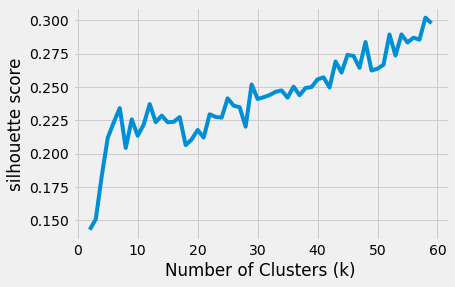

In [24]:
range_n_clusters = [x for x in range(2,60)]
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(tfidf)

    silhouette_avg = silhouette_score(tfidf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)



style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()


In [25]:
num_clusters = 48 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit_predict(tfidf)
clusters = km.labels_.tolist()

data["Cluster"] = clusters

data.to_csv(f"humaneval_clusters_{num_clusters}.csv", index=False) 

In [26]:
print(data['Cluster'].value_counts()) #Print the counts of doc belonging `#to each cluster.`


24    1712
19    1671
17    1443
1     1366
0     1053
5      922
13     914
36     836
44     729
43     727
6      722
46     696
18     675
23     662
30     587
11     489
31     470
34     455
32     428
37     421
3      393
12     392
22     339
47     306
10     273
28     245
45     245
26     225
16     217
21     198
39     195
9      192
25     183
14     129
7      112
29     100
15      93
27      92
38      88
20      82
33      71
42      57
35      53
41      45
40      33
2       19
4       15
8       10
Name: Cluster, dtype: int64


In [27]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt



Cluster 0 words:

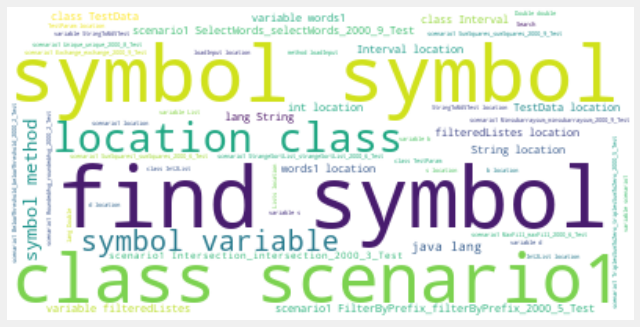



Cluster 1 words:

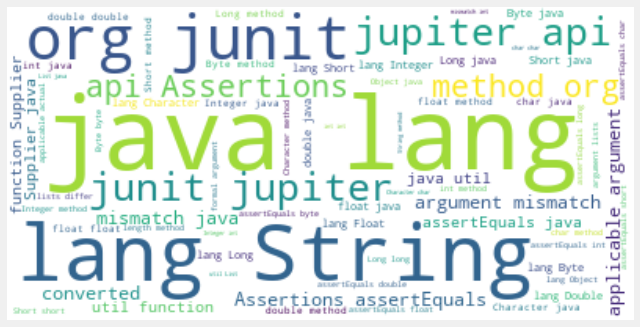



Cluster 2 words:

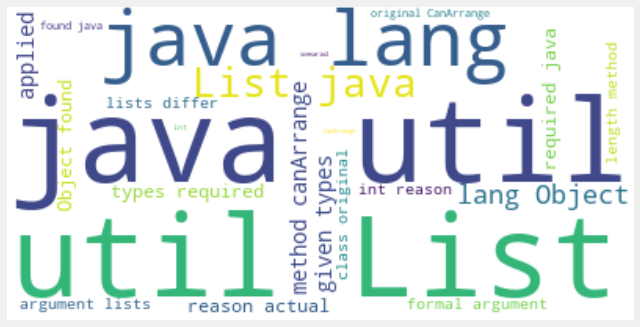



Cluster 3 words:

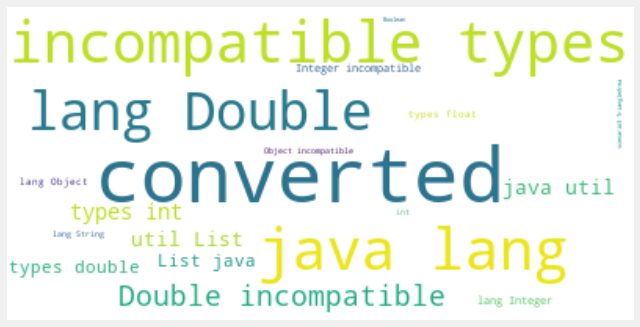



Cluster 4 words:

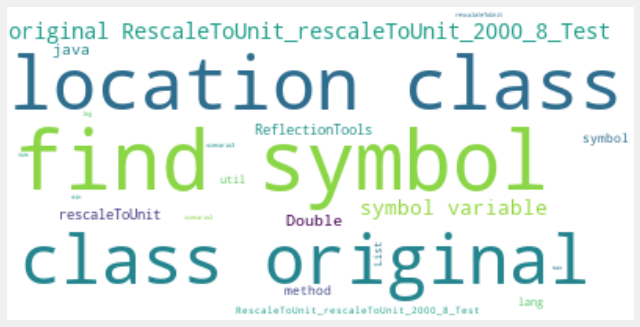



Cluster 5 words:

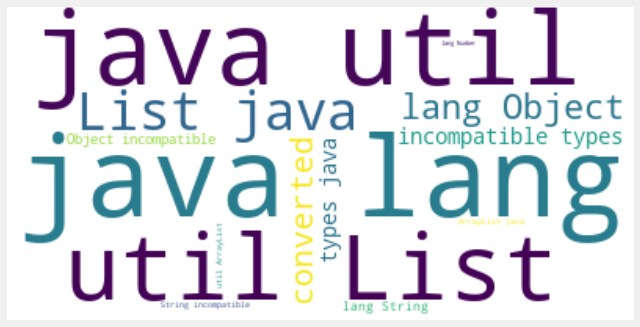



Cluster 6 words:

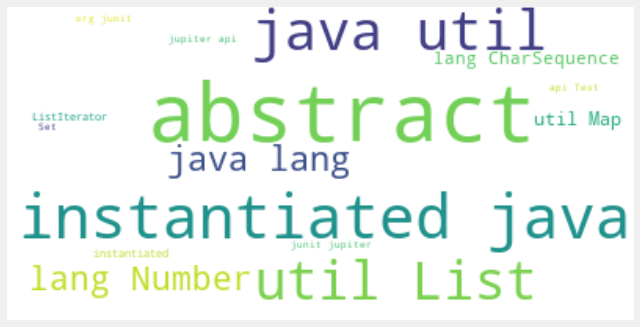



Cluster 7 words:

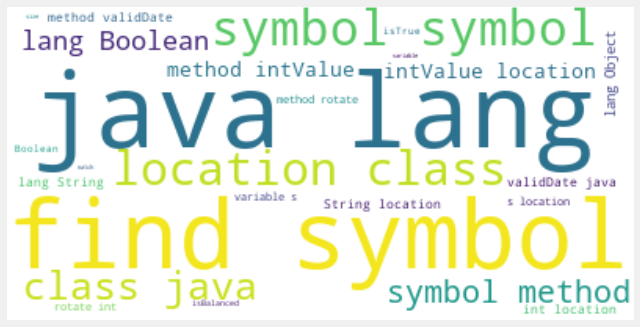



Cluster 8 words:

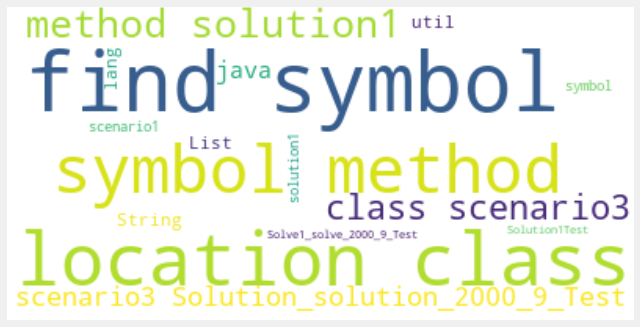



Cluster 9 words:

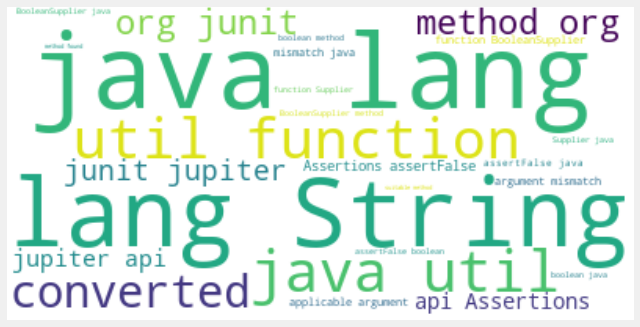



Cluster 10 words:

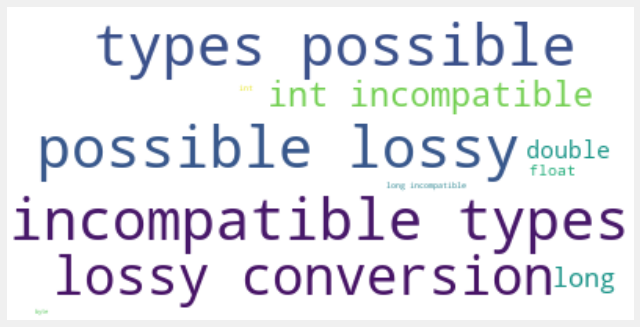



Cluster 11 words:

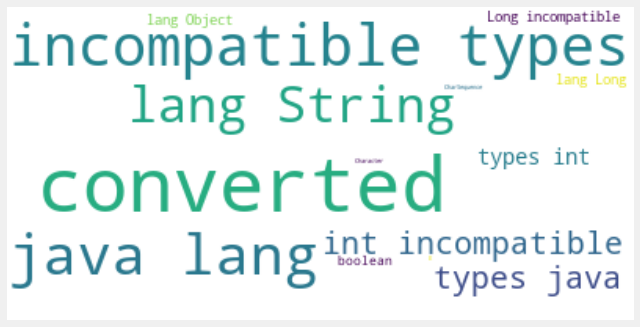



Cluster 12 words:

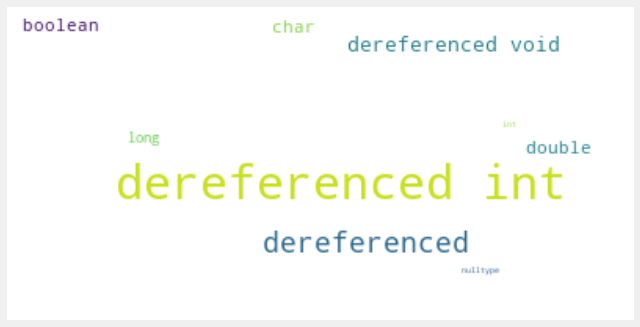



Cluster 13 words:

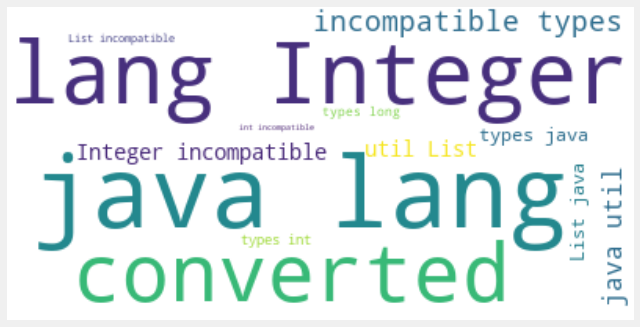



Cluster 14 words:

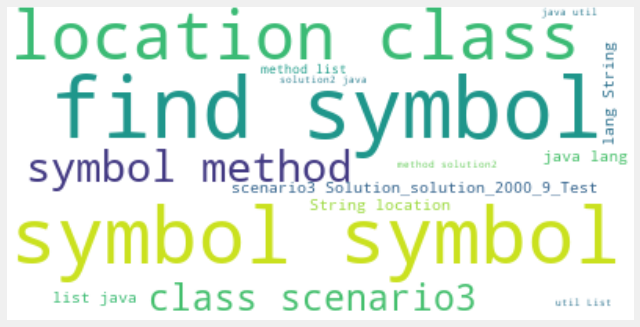



Cluster 15 words:

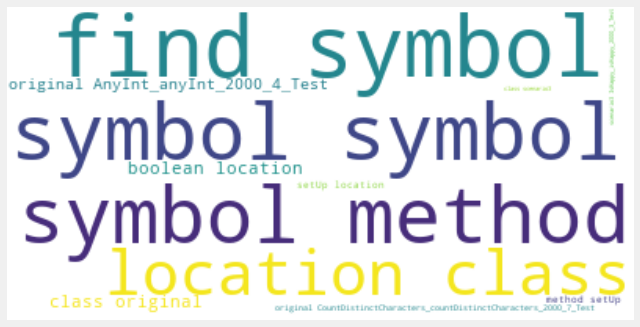



Cluster 16 words:

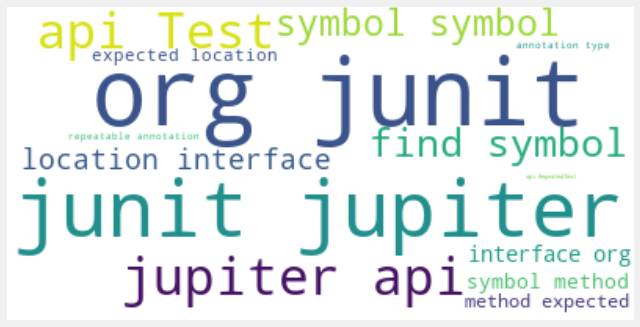



Cluster 17 words:

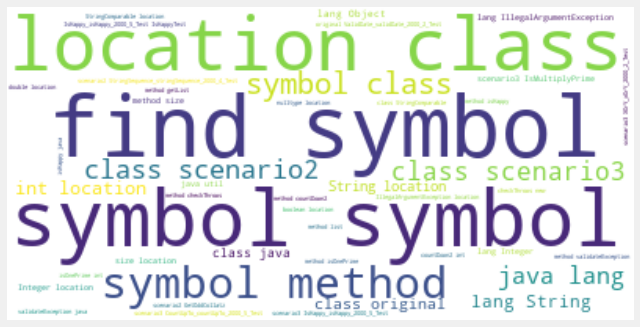



Cluster 18 words:

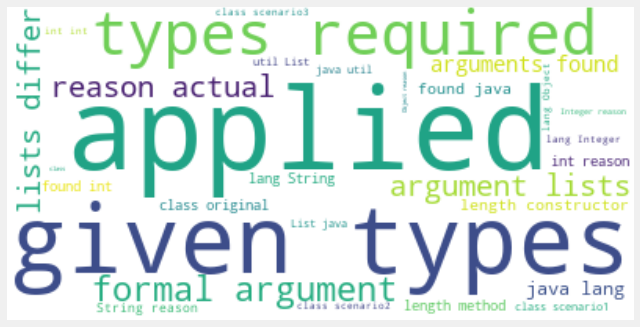



Cluster 19 words:

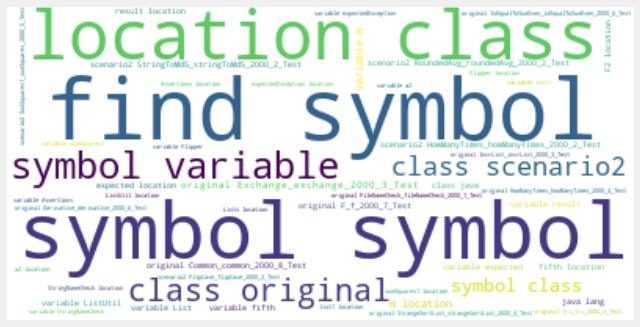



Cluster 20 words:

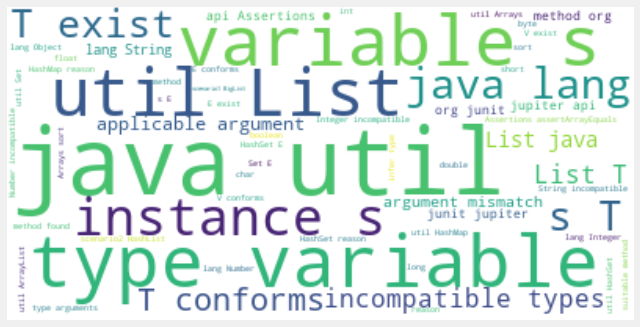



Cluster 21 words:

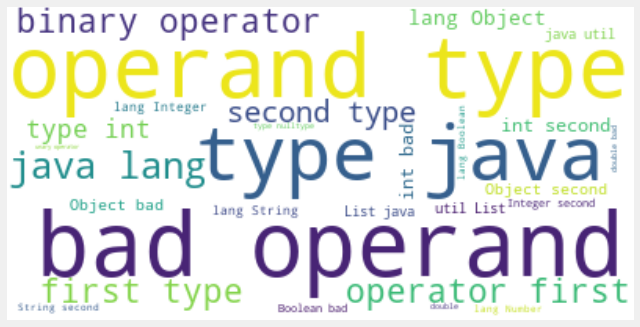



Cluster 22 words:

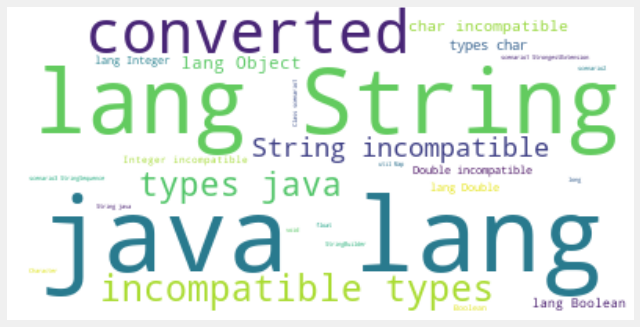



Cluster 23 words:

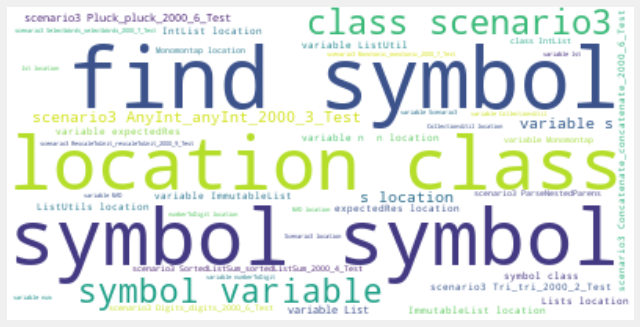



Cluster 24 words:

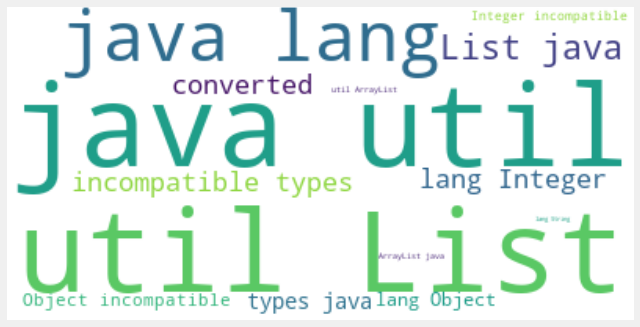



Cluster 25 words:

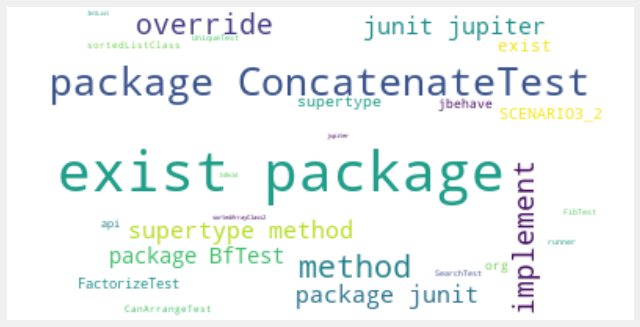



Cluster 26 words:

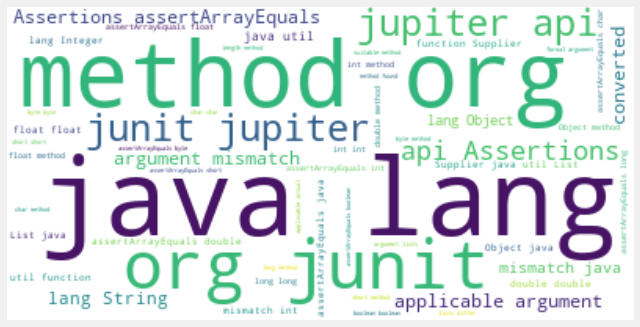



Cluster 27 words:

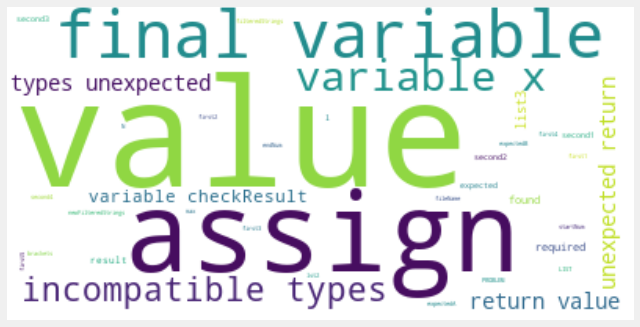



Cluster 28 words:

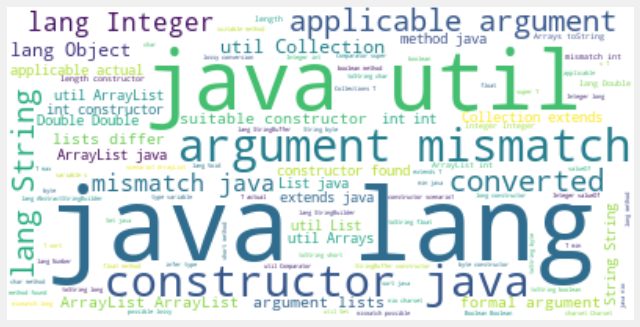



Cluster 29 words:

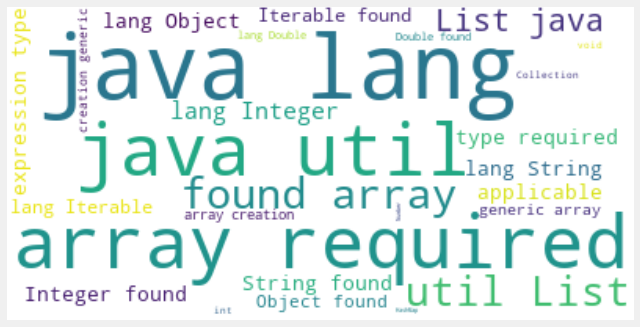



Cluster 30 words:

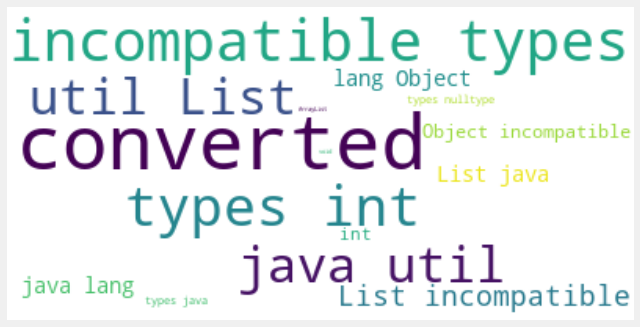



Cluster 31 words:

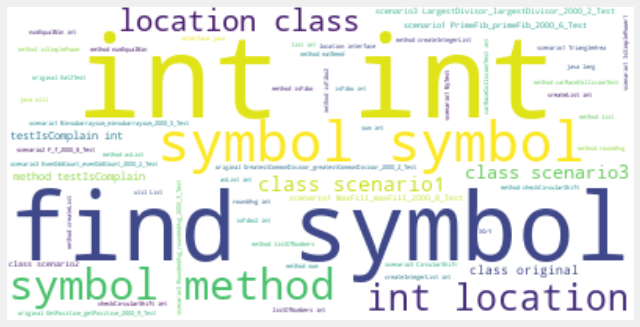



Cluster 32 words:

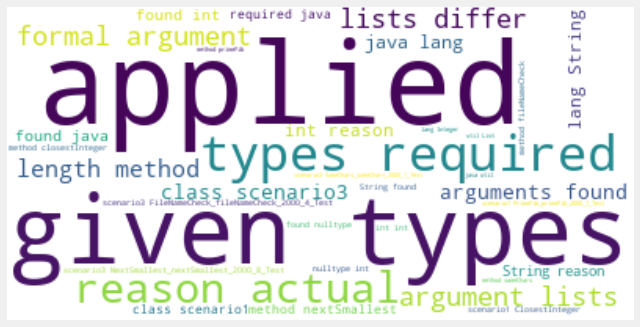



Cluster 33 words:

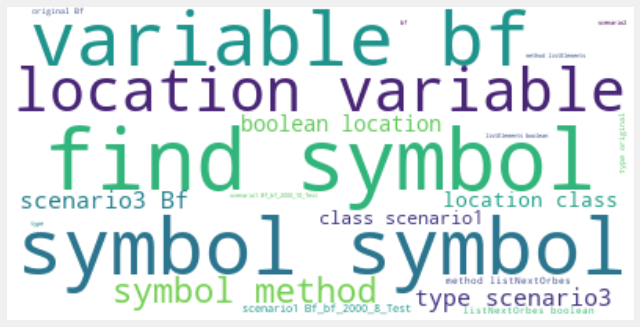



Cluster 34 words:

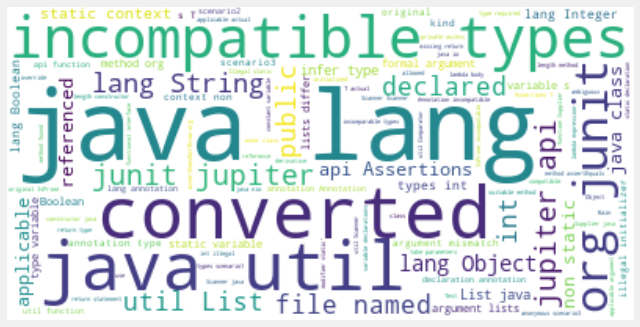



Cluster 35 words:

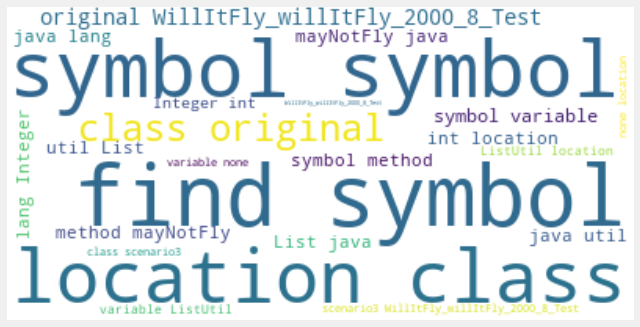



Cluster 36 words:

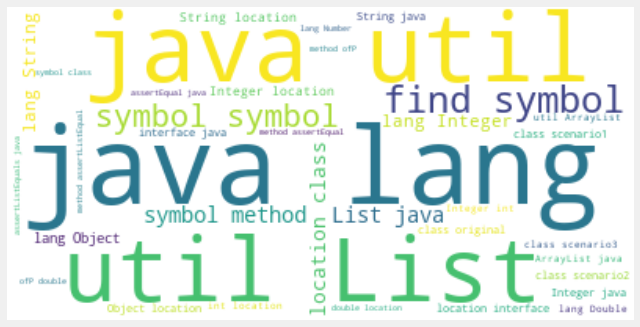



Cluster 37 words:

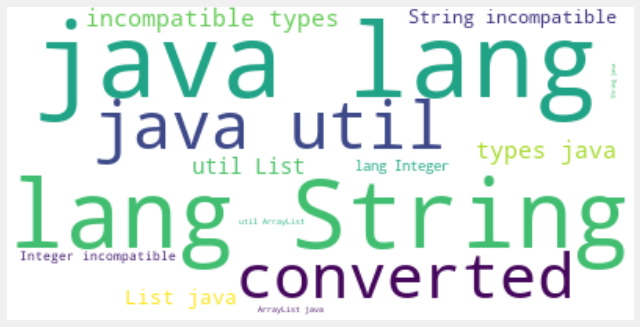



Cluster 38 words:

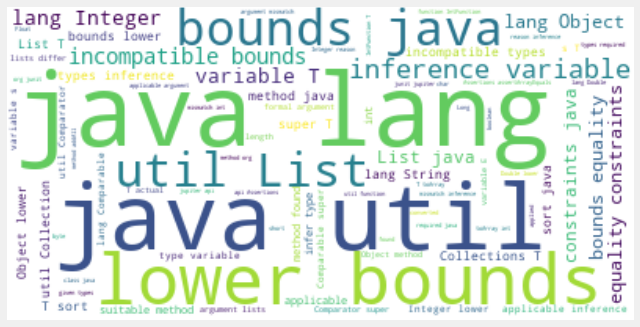



Cluster 39 words:

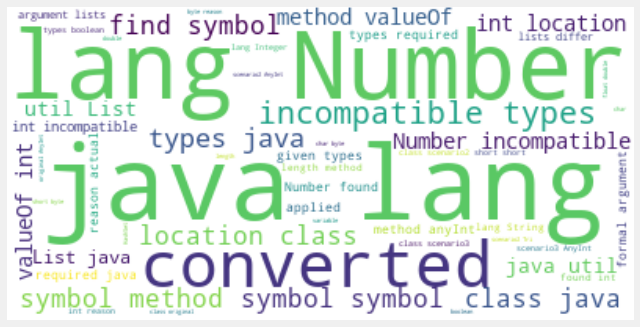



Cluster 40 words:

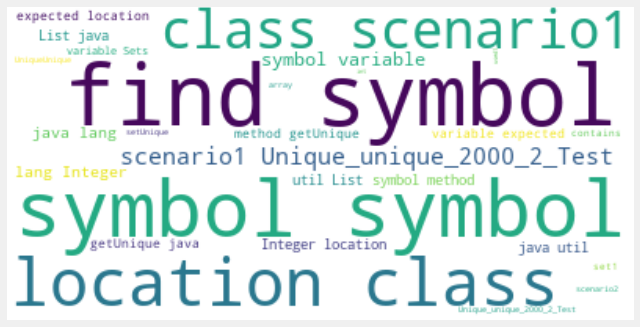



Cluster 41 words:

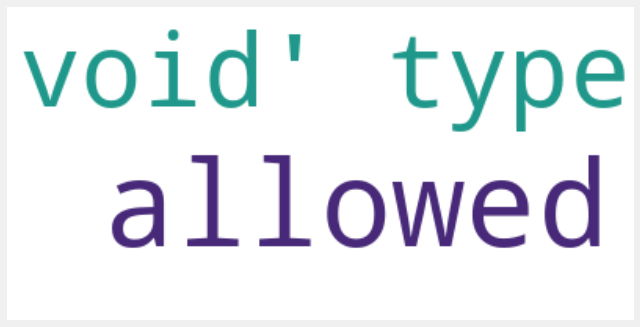



Cluster 42 words:

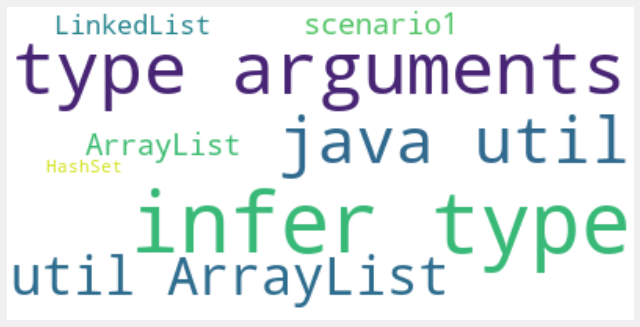



Cluster 43 words:

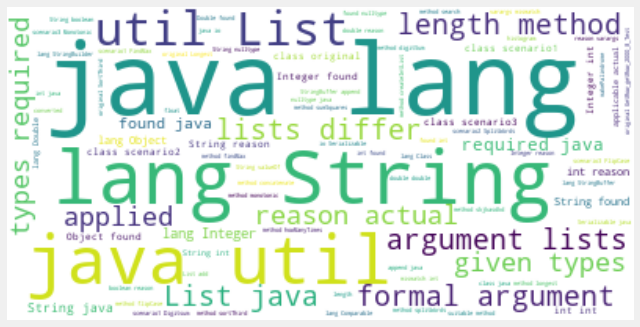



Cluster 44 words:

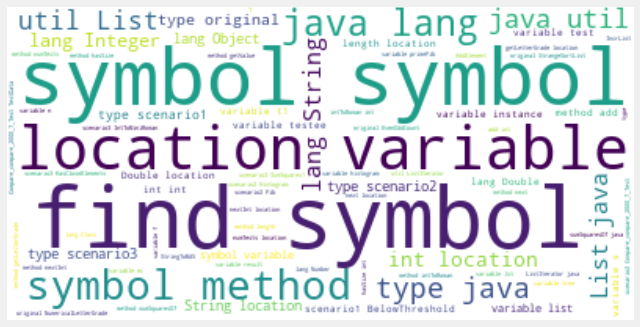



Cluster 45 words:

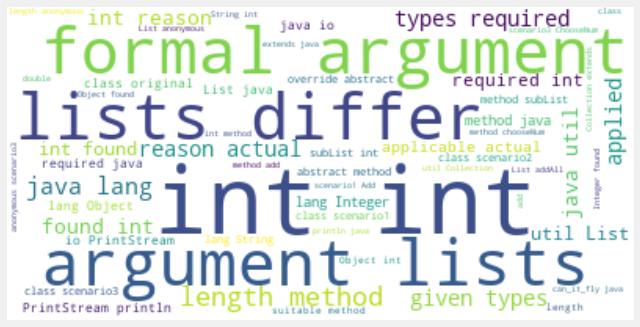



Cluster 46 words:

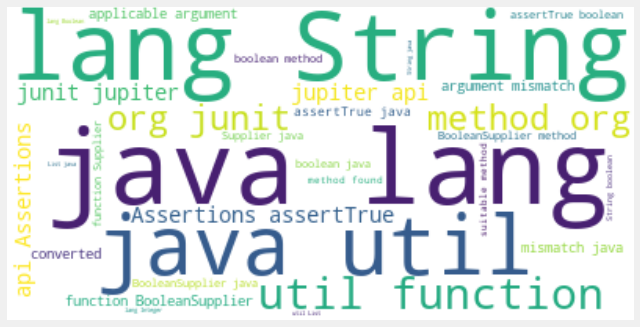



Cluster 47 words:

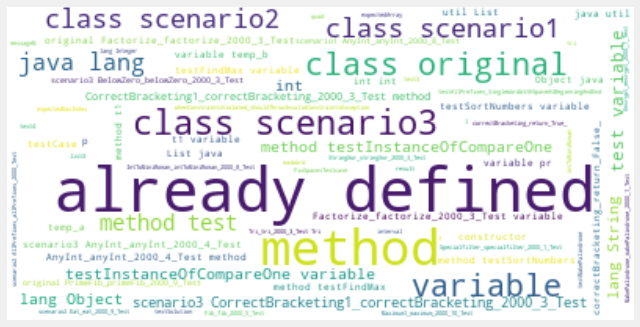

In [28]:
for x in range(0,num_clusters):
    print("\n")
    print("Cluster %d words:" % x, end='')
    
    words = ''
    for i in data[data['Cluster'] == x]['semantic reason'].values:
        words = words + ' '.join(i.split()) + ' '
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

For SF110 clustering

In [29]:
x = [0.017704850038841067, 0.01992161197991317, 0.01955010466498124, 0.022538180027137422, 0.02566264194421503, 0.02879376364156173, 0.03049444597313119, 0.03255872291219714, 0.0342318585715614, 0.032973158763945104, 0.03698338908050543, 0.03417621506303553, 0.03535497132020165, 0.04022726817127417, 0.03010997464900111, 0.03657384949120008, 0.040004910542358434, 0.04117714080414533, 0.04281310395722796, 0.03997774258256571, 0.04594573413001559, 0.0412221731103347, 0.041855785084716775, 0.04553776042040133, 0.045006463302521345, 0.04451685239976632, 0.05288474848259429, 0.04206275855410157, 0.04690951317805379, 0.05239966021067413, 0.051909881013086266, 0.052667078802584186, 0.05213225321668564, 0.04297792386713577, 0.04410666497738686, 0.05145751251571699, 0.05100245837159291, 0.05250659222493132, 0.0529362220532025, 0.05712392426136983, 0.054981845821043866, 0.059412214900007525, 0.05305871289428097, 0.055482465575584165, 0.05696550691309296, 0.05161602222348573, 0.052432953212166095, 0.062195676663681074, 0.06103644126657495, 0.061584996346149605, 0.05967899906831443, 0.05910165506703938, 0.060858435622194035, 0.0625666115222539, 0.06390958525113033, 0.06514568115906162, 0.06430141109451423, 0.05745282052848227, 0.05980168639829024, 0.06762136074740675, 0.05991272139229138, 0.06690158864533381, 0.06636669363525509, 0.062090852688152794, 0.06441469263241874, 0.06868201565554156, 0.06900522571021568, 0.07172463114437985, 0.07142265410876372, 0.0689658129913507, 0.0738327584960748, 0.07301611791636323, 0.07397656797599624, 0.06909520320584024, 0.07026838886808487, 0.07200391844672333, 0.06890829123324972, 0.06796062966809335, 0.0743819874299976, 0.07447416355004839, 0.06975345826738714, 0.07286791755124691, 0.0682027215852423, 0.07022368532276513, 0.07138030218585156, 0.0800613906525937, 0.07304018217497596, 0.07820794890356025, 0.07613216032713976, 0.0715501575161527, 0.07618762311505618, 0.0762871046857221, 0.07850604509000939, 0.07779796769152916, 0.07574955474710421, 0.08020037086181665, 0.07770540530936247, 0.08262662750895088, 0.07558346130688208]

In [30]:
y = [i for i in range(2,101)]

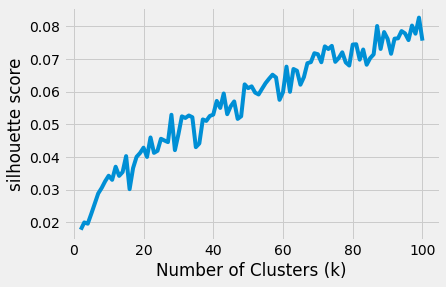

In [31]:
plt.plot(y, x)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [32]:
For n_clusters = 2 The average silhouette_score is : 0.017704850038841067
For n_clusters = 3 The average silhouette_score is : 0.01992161197991317
For n_clusters = 4 The average silhouette_score is : 0.01955010466498124
For n_clusters = 5 The average silhouette_score is : 0.022538180027137422
For n_clusters = 6 The average silhouette_score is : 0.02566264194421503
For n_clusters = 7 The average silhouette_score is : 0.02879376364156173
For n_clusters = 8 The average silhouette_score is : 0.03049444597313119
For n_clusters = 9 The average silhouette_score is : 0.03255872291219714
For n_clusters = 10 The average silhouette_score is : 0.0342318585715614
For n_clusters = 11 The average silhouette_score is : 0.032973158763945104
For n_clusters = 12 The average silhouette_score is : 0.03698338908050543
For n_clusters = 13 The average silhouette_score is : 0.03417621506303553
For n_clusters = 14 The average silhouette_score is : 0.03535497132020165
For n_clusters = 15 The average silhouette_score is : 0.04022726817127417
For n_clusters = 16 The average silhouette_score is : 0.03010997464900111
For n_clusters = 17 The average silhouette_score is : 0.03657384949120008
For n_clusters = 18 The average silhouette_score is : 0.040004910542358434
For n_clusters = 19 The average silhouette_score is : 0.04117714080414533
For n_clusters = 20 The average silhouette_score is : 0.04281310395722796
For n_clusters = 21 The average silhouette_score is : 0.03997774258256571
For n_clusters = 22 The average silhouette_score is : 0.04594573413001559
For n_clusters = 23 The average silhouette_score is : 0.0412221731103347
For n_clusters = 24 The average silhouette_score is : 0.041855785084716775
For n_clusters = 25 The average silhouette_score is : 0.04553776042040133
For n_clusters = 26 The average silhouette_score is : 0.045006463302521345
For n_clusters = 27 The average silhouette_score is : 0.04451685239976632
For n_clusters = 28 The average silhouette_score is : 0.05288474848259429
For n_clusters = 29 The average silhouette_score is : 0.04206275855410157
For n_clusters = 30 The average silhouette_score is : 0.04690951317805379
For n_clusters = 31 The average silhouette_score is : 0.05239966021067413
For n_clusters = 32 The average silhouette_score is : 0.051909881013086266
For n_clusters = 33 The average silhouette_score is : 0.052667078802584186
For n_clusters = 34 The average silhouette_score is : 0.05213225321668564
For n_clusters = 35 The average silhouette_score is : 0.04297792386713577
For n_clusters = 36 The average silhouette_score is : 0.04410666497738686
For n_clusters = 37 The average silhouette_score is : 0.05145751251571699
For n_clusters = 38 The average silhouette_score is : 0.05100245837159291
For n_clusters = 39 The average silhouette_score is : 0.05250659222493132
For n_clusters = 40 The average silhouette_score is : 0.0529362220532025
For n_clusters = 41 The average silhouette_score is : 0.05712392426136983
For n_clusters = 42 The average silhouette_score is : 0.054981845821043866
For n_clusters = 43 The average silhouette_score is : 0.059412214900007525
For n_clusters = 44 The average silhouette_score is : 0.05305871289428097
For n_clusters = 45 The average silhouette_score is : 0.055482465575584165
For n_clusters = 46 The average silhouette_score is : 0.05696550691309296
For n_clusters = 47 The average silhouette_score is : 0.05161602222348573
For n_clusters = 48 The average silhouette_score is : 0.052432953212166095
For n_clusters = 49 The average silhouette_score is : 0.062195676663681074
For n_clusters = 50 The average silhouette_score is : 0.06103644126657495
For n_clusters = 51 The average silhouette_score is : 0.061584996346149605
For n_clusters = 52 The average silhouette_score is : 0.05967899906831443
For n_clusters = 53 The average silhouette_score is : 0.05910165506703938
For n_clusters = 54 The average silhouette_score is : 0.060858435622194035
For n_clusters = 55 The average silhouette_score is : 0.0625666115222539
For n_clusters = 56 The average silhouette_score is : 0.06390958525113033
For n_clusters = 57 The average silhouette_score is : 0.06514568115906162
For n_clusters = 58 The average silhouette_score is : 0.06430141109451423
For n_clusters = 59 The average silhouette_score is : 0.05745282052848227
For n_clusters = 60 The average silhouette_score is : 0.05980168639829024
For n_clusters = 61 The average silhouette_score is : 0.06762136074740675
For n_clusters = 62 The average silhouette_score is : 0.05991272139229138
For n_clusters = 63 The average silhouette_score is : 0.06690158864533381
For n_clusters = 64 The average silhouette_score is : 0.06636669363525509
For n_clusters = 65 The average silhouette_score is : 0.062090852688152794
For n_clusters = 66 The average silhouette_score is : 0.06441469263241874
For n_clusters = 67 The average silhouette_score is : 0.06868201565554156
For n_clusters = 68 The average silhouette_score is : 0.06900522571021568
For n_clusters = 69 The average silhouette_score is : 0.07172463114437985
For n_clusters = 70 The average silhouette_score is : 0.07142265410876372
For n_clusters = 71 The average silhouette_score is : 0.0689658129913507
For n_clusters = 72 The average silhouette_score is : 0.0738327584960748
For n_clusters = 73 The average silhouette_score is : 0.07301611791636323
For n_clusters = 74 The average silhouette_score is : 0.07397656797599624
For n_clusters = 75 The average silhouette_score is : 0.06909520320584024
For n_clusters = 76 The average silhouette_score is : 0.07026838886808487
For n_clusters = 77 The average silhouette_score is : 0.07200391844672333
For n_clusters = 78 The average silhouette_score is : 0.06890829123324972
For n_clusters = 79 The average silhouette_score is : 0.06796062966809335
For n_clusters = 80 The average silhouette_score is : 0.0743819874299976
For n_clusters = 81 The average silhouette_score is : 0.07447416355004839
For n_clusters = 82 The average silhouette_score is : 0.06975345826738714
For n_clusters = 83 The average silhouette_score is : 0.07286791755124691
For n_clusters = 84 The average silhouette_score is : 0.0682027215852423
For n_clusters = 85 The average silhouette_score is : 0.07022368532276513
For n_clusters = 86 The average silhouette_score is : 0.07138030218585156
For n_clusters = 87 The average silhouette_score is : 0.0800613906525937
For n_clusters = 88 The average silhouette_score is : 0.07304018217497596
For n_clusters = 89 The average silhouette_score is : 0.07820794890356025
For n_clusters = 90 The average silhouette_score is : 0.07613216032713976
For n_clusters = 91 The average silhouette_score is : 0.0715501575161527
For n_clusters = 92 The average silhouette_score is : 0.07618762311505618
For n_clusters = 93 The average silhouette_score is : 0.0762871046857221
For n_clusters = 94 The average silhouette_score is : 0.07850604509000939
For n_clusters = 95 The average silhouette_score is : 0.07779796769152916
For n_clusters = 96 The average silhouette_score is : 0.07574955474710421
For n_clusters = 97 The average silhouette_score is : 0.08020037086181665
For n_clusters = 98 The average silhouette_score is : 0.07770540530936247
For n_clusters = 99 The average silhouette_score is : 0.08262662750895088
For n_clusters = 100 The average silhouette_score is : 0.07558346130688208

SyntaxError: invalid syntax (3895290068.py, line 1)